### Name Entity From Capital Letter Words

In [ ]:
#!pip install kneed

In [1]:
import pandas as pd
import numpy as np
import re
from kneed import KneeLocator

#### Capital Letter Word And Lower Letter Word

In [2]:
df = pd.read_csv("/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/English/Result/Word/Capital/Not_Apply_Lower_Word_Merge_Result.csv") # Not apply lower technique
df

,word,frequency,ratio,cumul_ratio
0,I,93652765,3.692194e+00,3.692194
1,you,75979154,2.995424e+00,6.687618
2,the,67943057,2.678607e+00,9.366225
3,to,56467428,2.226188e+00,11.592414
4,s,50166433,1.977776e+00,13.570190
...,...,...,...,...
3157922,includingnataliamallory,1,3.942429e-08,100.000000
3157923,Plaiedes,1,3.942429e-08,100.000000
3157924,includingmyfriendBrida,1,3.942429e-08,100.000000
3157925,includingmyfavorite,1,3.942429e-08,100.000000


In [3]:
df = df[df.iloc[:,1]>=5]

In [4]:
def word_length(var):
    var = str(var)
    if len(var) <= 12:
        return var
    else:
        return "word is bigger than adjust value"

In [5]:
df = pd.DataFrame(df.iloc[:,0].apply(lambda x: word_length(x)))

In [6]:
df.drop(df[df.iloc[:,0] == "word is bigger than adjust value"].index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,word
0,I
1,you
2,the
3,to
4,s
...,...
870708,ddoit
870709,innere
870710,fminus
870711,Conquestus


In [7]:
capital_word_list = []
lower_word_list = []
for i in df.iloc[:,0]:
    i = str(i)
    if i[0].isupper():
        capital_word_list.append(i)
    else:
        lower_word_list.append(i)

In [8]:
df_capital = pd.DataFrame(capital_word_list)
df_capital.rename(columns={0:"word"}, inplace=True)
df_capital = pd.DataFrame(df_capital.iloc[:,0].apply(lambda x: x.capitalize()))
df_capital

,word
0,I
1,You
2,It
3,What
4,We
...,...
518943,Treportoni
518944,Ikemizu
518945,Morningma
518946,Yourone


In [9]:
df_capital_to_lower = pd.DataFrame(df_capital.iloc[:,0].apply(lambda x : x.lower()))
df_capital_to_lower

,word
0,i
1,you
2,it
3,what
4,we
...,...
518943,treportoni
518944,ikemizu
518945,morningma
518946,yourone


In [10]:
df_lower = pd.DataFrame(lower_word_list)
df_lower.rename(columns={0:"word"}, inplace=True)
df_lower

,word
0,you
1,the
2,to
3,s
4,not
...,...
351760,heavybrowed
351761,ddoit
351762,innere
351763,fminus


In [11]:
df_lower_to_lower = pd.DataFrame(df_lower.iloc[:,0].apply(lambda x : x.lower()))
df_lower_to_lower

,word
0,you
1,the
2,to
3,s
4,not
...,...
351760,heavybrowed
351761,ddoit
351762,innere
351763,fminus


In [12]:
capital_set = set(df_capital_to_lower.iloc[:,0])

In [13]:
lower_set = set(df_lower_to_lower.iloc[:,0])

In [14]:
df_all_capital = pd.DataFrame(capital_set.difference(lower_set)) # compare capital letter word and lower letter word
df_all_capital.rename(columns={0:"word"}, inplace=True)
#df_all_capital = pd.DataFrame(df_all_capital.iloc[:,0].apply(lambda x: x.capitalize()))
df_all_capital

,word
0,okishima
1,keerikadan
2,goniec
3,elona
4,hephep
...,...
296487,nagast
296488,tronçais
296489,kwitnys
296490,debenhams


In [15]:
# Check result with all capital word
# df_merge = pd.merge(df_capital, df_all_capital, how="inner", on="word")
# df_merge.drop_duplicates(inplace=True)
# df_merge.reset_index(drop=True, inplace=True)
# df_merge

In [16]:
df_all_capital.to_excel("All_Capital_Letter_Word.xlsx", sheet_name="Word", index=False)

#### Sentence First Word Analysis

In [17]:
df_sent = pd.read_csv("/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/English/Result/Sentence/Merge/Sentence_Merge.csv")
df_sent

,sentence,frequency
0,no,3360789
1,yeah,3200757
2,yes,2042693
3,what,2013276
4,okay,1800201
...,...,...
16268905,tonight s party that s included,4
16268906,if the class signs on,4
16268907,her presence gives us an advantage to continue...,4
16268908,that s exactly what you can use,4


In [ ]:
#df_sent = df_sent[df_sent.iloc[:,1]>=5]

In [18]:
first_words = []
for i in df_sent.iloc[:,0]: # Select sentence first word
    words = re.findall("\w+", i, re.UNICODE)
    first_words.append(words[0])

In [19]:
first_ser = pd.Series(first_words)
first_ser

0                no
1              yeah
2               yes
3              what
4              okay
             ...   
16268905    tonight
16268906         if
16268907        her
16268908       that
16268909       that
Length: 16268910, dtype: object

In [20]:
df_first = pd.DataFrame(first_ser.value_counts(ascending=False))
df_first.reset_index(inplace=True)
df_first.rename(columns={"index":"word", 0:"frequency"}, inplace=True)
df_first

,word,frequency
0,i,2088048
1,you,1120699
2,it,561350
3,we,492492
4,and,446953
...,...,...
260409,decruz,1
260410,indecision,1
260411,ind,1
260412,hilldales,1


In [21]:
set_first = set(df_first.iloc[:,0])

In [22]:
set_all_capital = set(df_all_capital.iloc[:,0])

In [23]:
df_all_spec = pd.DataFrame(set_all_capital.difference(set_first)) # Capital letter word and first sentence word
df_all_spec.rename(columns={0:"word"}, inplace=True)
df_all_spec

,word
0,keerikadan
1,ìimi
2,hennessys
3,cherice
4,chosimba
...,...
193135,indicom
193136,nagast
193137,tronçais
193138,kwitnys


In [24]:
df_all_spec.to_excel("Special_Name_Exactly.xlsx", sheet_name="Spec_Name", index=False)

#### Spec Name Knee Point

In [25]:
df_word = pd.read_csv("/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/English/Result/Word/Merge/Word_Merge.csv") # for frequency
df_word

,word,frequency
0,you,102069964
1,i,94447074
2,the,77481215
3,to,58281119
4,is,50852895
...,...,...
554993,rinell,6
554994,ciearcut,6
554995,saeyon,6
554996,beiroshano,6


In [26]:
df_all_spec_freq = pd.merge(df_word, df_all_spec, how="inner", on="word") # frequency value
df_all_spec_freq

,word,frequency
0,mnköö,20577
1,iast,5377
2,iong,4648
3,iittle,2923
4,elanna,1798
...,...,...
148105,grundman,6
148106,rinell,6
148107,saeyon,6
148108,beiroshano,6


In [27]:
total_freq_spec = df_all_spec_freq.iloc[:,1].sum()
total_freq_spec

3017522

In [28]:
df_all_spec_freq["ratio"] = round(((df_all_spec_freq.iloc[:,1]/total_freq_spec)*100),7)
df_all_spec_freq

,word,frequency,ratio
0,mnköö,20577,0.681917
1,iast,5377,0.178193
2,iong,4648,0.154034
3,iittle,2923,0.096868
4,elanna,1798,0.059585
...,...,...,...
148105,grundman,6,0.000199
148106,rinell,6,0.000199
148107,saeyon,6,0.000199
148108,beiroshano,6,0.000199


In [29]:
df_all_spec_freq["cumul_ratio"] = np.cumsum(df_all_spec_freq.iloc[:,2])
df_all_spec_freq

,word,frequency,ratio,cumul_ratio
0,mnköö,20577,0.681917,0.681917
1,iast,5377,0.178193,0.860110
2,iong,4648,0.154034,1.014143
3,iittle,2923,0.096868,1.111011
4,elanna,1798,0.059585,1.170596
...,...,...,...,...
148105,grundman,6,0.000199,99.998793
148106,rinell,6,0.000199,99.998992
148107,saeyon,6,0.000199,99.999191
148108,beiroshano,6,0.000199,99.999389


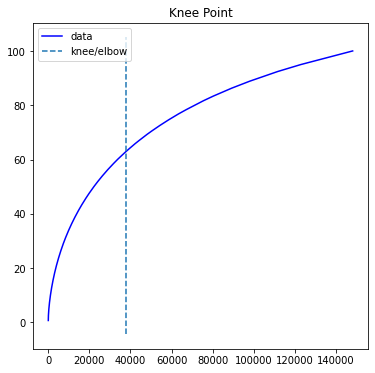

In [30]:
spec_kneedle = KneeLocator(x=df_all_spec_freq.cumul_ratio.index, y=df_all_spec_freq.cumul_ratio, S=1.0, curve="concave", direction="increasing")
spec_kneedle.plot_knee()

In [31]:
print(round(spec_kneedle.knee_y))

63


In [32]:
knee_point_spec = round(spec_kneedle.knee_y)

In [33]:
df_spec_knee = df_all_spec_freq[df_all_spec_freq.cumul_ratio <= knee_point_spec]
df_spec_knee

,word,frequency,ratio,cumul_ratio
0,mnköö,20577,0.681917,0.681917
1,iast,5377,0.178193,0.860110
2,iong,4648,0.154034,1.014143
3,iittle,2923,0.096868,1.111011
4,elanna,1798,0.059585,1.170596
...,...,...,...,...
37892,halps,20,0.000663,62.997337
37893,gabriels,20,0.000663,62.998000
37894,racklis,20,0.000663,62.998663
37895,biattis,20,0.000663,62.999326


In [34]:
df_spec_knee.to_excel("Special_Name_Exactly_Knee.xlsx", sheet_name="Spec_Name", index=False)

#### Sentence First Word Knee Point

In [35]:
df_first = df_first[df_first.iloc[:,1]>=5]

In [36]:
total_freq_first = df_first.iloc[:,1].sum()
total_freq_first

15964756

In [37]:
df_first["ratio"] = round(((df_first.iloc[:,1]/total_freq_first)*100),7)
df_first

,word,frequency,ratio
0,i,2088048,13.079110
1,you,1120699,7.019832
2,it,561350,3.516183
3,we,492492,3.084870
4,and,446953,2.799623
...,...,...,...
44217,paella,5,0.000031
44218,skee,5,0.000031
44219,auctioned,5,0.000031
44220,scapegoat,5,0.000031


In [38]:
df_first["cumul_ratio"] = np.cumsum(df_first.iloc[:,2])
df_first

,word,frequency,ratio,cumul_ratio
0,i,2088048,13.079110,13.079110
1,you,1120699,7.019832,20.098942
2,it,561350,3.516183,23.615125
3,we,492492,3.084870,26.699995
4,and,446953,2.799623,29.499618
...,...,...,...,...
44217,paella,5,0.000031,99.999673
44218,skee,5,0.000031,99.999704
44219,auctioned,5,0.000031,99.999735
44220,scapegoat,5,0.000031,99.999767


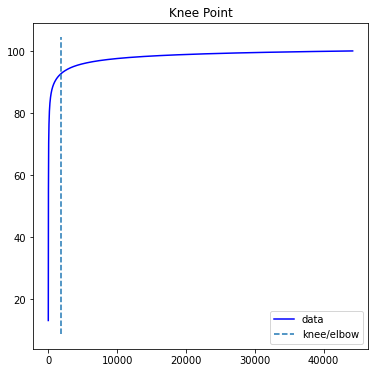

In [39]:
first_kneedle = KneeLocator(x=df_first.cumul_ratio.index, y=df_first.cumul_ratio, S=1.0, curve="concave", direction="increasing")
first_kneedle.plot_knee()

In [40]:
print(round(first_kneedle.knee_y))

93


In [41]:
knee_point_first = round(first_kneedle.knee_y)

In [42]:
df_first_knee = df_first[df_first.cumul_ratio <= knee_point_first]
df_first_knee

,word,frequency,ratio,cumul_ratio
0,i,2088048,13.079110,13.079110
1,you,1120699,7.019832,20.098942
2,it,561350,3.516183,23.615125
3,we,492492,3.084870,26.699995
4,and,446953,2.799623,29.499618
...,...,...,...,...
2021,base,279,0.001748,92.992596
2022,hola,279,0.001748,92.994344
2023,ella,279,0.001748,92.996091
2024,miller,279,0.001748,92.997839


In [43]:
df_first_knee.to_excel("First_Word_Knee.xlsx", sheet_name="Word", index=False)

In [44]:
df_first_no_knee = df_first[df_first.cumul_ratio > knee_point_first]
df_first_no_knee.reset_index(drop=True, inplace=True)
df_first_no_knee = df_first_no_knee.iloc[:,0:2]
df_first_no_knee

,word,frequency
0,sire,278
1,serve,278
2,squeeze,278
3,note,278
4,carmen,278
...,...,...
42191,paella,5
42192,skee,5
42193,auctioned,5
42194,scapegoat,5


In [45]:
#df_first_no_knee.to_excel("First_Word_No_Knee.xlsx", sheet_name="Word", index=False)

In [46]:
set_first_knee = set(df_first_knee.iloc[:,0])

In [47]:
set_first_no_knee = set(df_first_no_knee.iloc[:,0])

In [48]:
#set_all_capital = set(df_all_capital.iloc[:,0])

In [49]:
df_all_knee = pd.DataFrame(set_all_capital.difference(set_first_knee)) # Capital letter word and first sentenc word knee analysis
df_all_knee.rename(columns={0:"word"}, inplace=True)
df_all_knee

,word
0,okishima
1,goniec
2,ìimi
3,hennessys
4,unbok
...,...
296487,wtsm
296488,darwell
296489,cgt
296490,fukikoshi


#### First 40 000 Word And Capital Letter Word Analysis

In [50]:
df_word = pd.read_csv("/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/English/Result/Word/Merge/Word_Merge.csv")
df_word = df_word.head(40000)
df_word

,word,frequency
0,you,102069964
1,i,94447074
2,the,77481215
3,to,58281119
4,is,50852895
...,...,...
39995,suiting,793
39996,kamen,792
39997,chockfull,792
39998,ostensibly,792


In [51]:
set_word = set(df_word.iloc[:,0])

In [52]:
set_all_knee = set(df_all_knee.iloc[:,0])

In [53]:
df_word_capital = pd.DataFrame(set_word.intersection(set_all_knee))
df_word_capital.rename(columns={0:"word"}, inplace=True)
df_word_capital

,word
0,galadriel
1,themistokles
2,torben
3,kuzco
4,yim
...,...
921,gertrud
922,dersu
923,jabez
924,blomkvist


In [54]:
df_word_capital.to_excel("Word_And_Capital_Letter_Word_Intersect.xlsx", sheet_name="Word_Capital", index=False)